In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
data=pd.read_csv('/content/House_Pricing.csv')

In [28]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

In [30]:
data.isna().sum()

ID                                               0
Date House was Sold                              0
Sale Price                                       4
No of Bedrooms                                   0
No of Bathrooms                                  4
Flat Area (in Sqft)                              9
Lot Area (in Sqft)                               9
No of Floors                                     0
Waterfront View                                  0
No of Times Visited                          19489
Condition of the House                           0
Overall Grade                                    0
Area of the House from Basement (in Sqft)        3
Basement Area (in Sqft)                          0
Age of House (in Years)                          0
Renovated Year                                   0
Zipcode                                          1
Latitude                                         1
Longitude                                        1
Living Area after Renovation (i

In [31]:
data['No of Times Visited'].unique()

array([nan, 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [24]:
# find the relation of "no of times visited" column to other columns

In [25]:
import missingno as msno

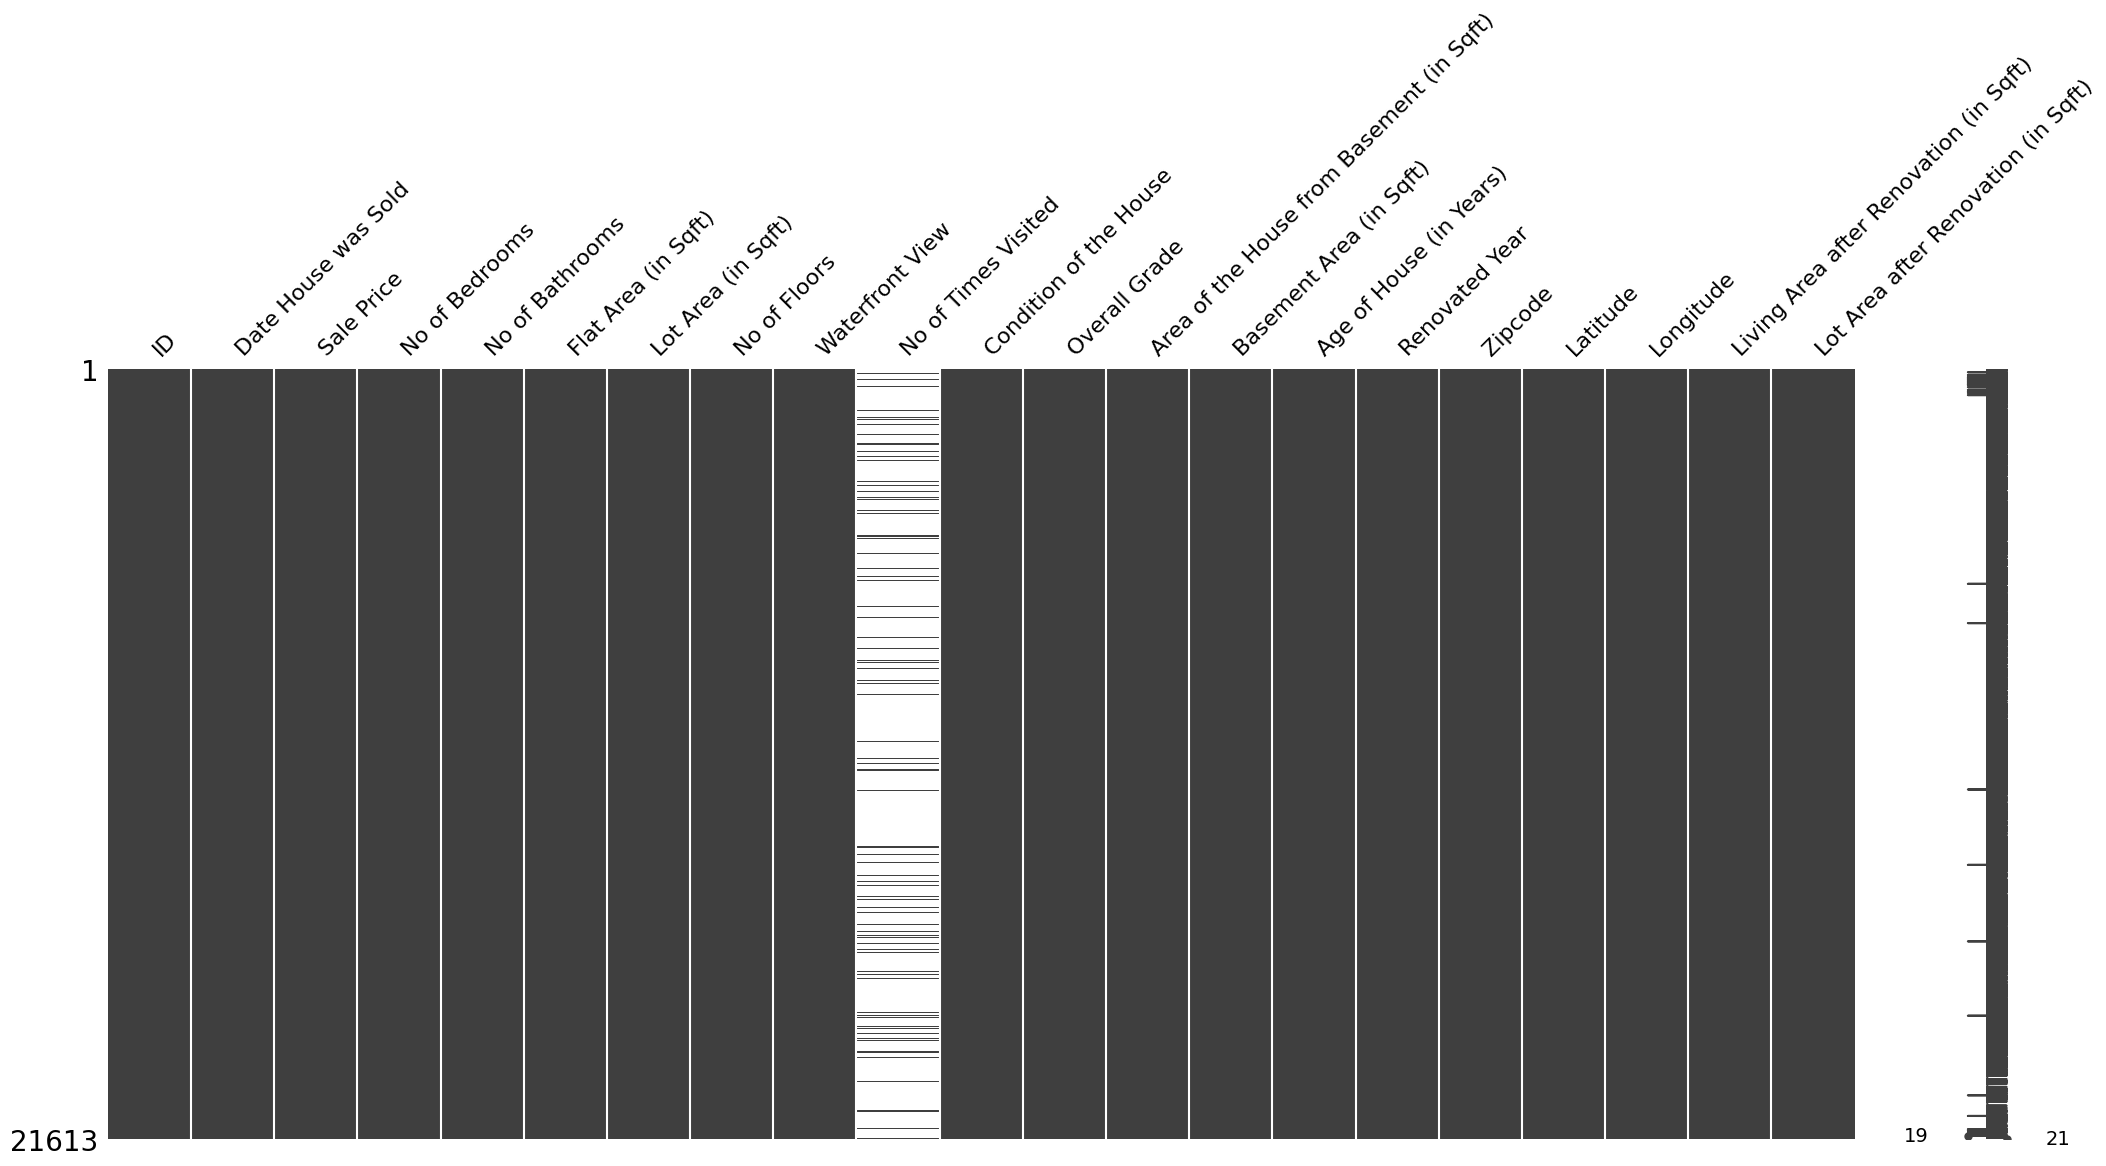

<Figure size 1500x900 with 0 Axes>

In [32]:
msno.matrix(data)
plt.figure(figsize=(15,9))
plt.show()

<Axes: >

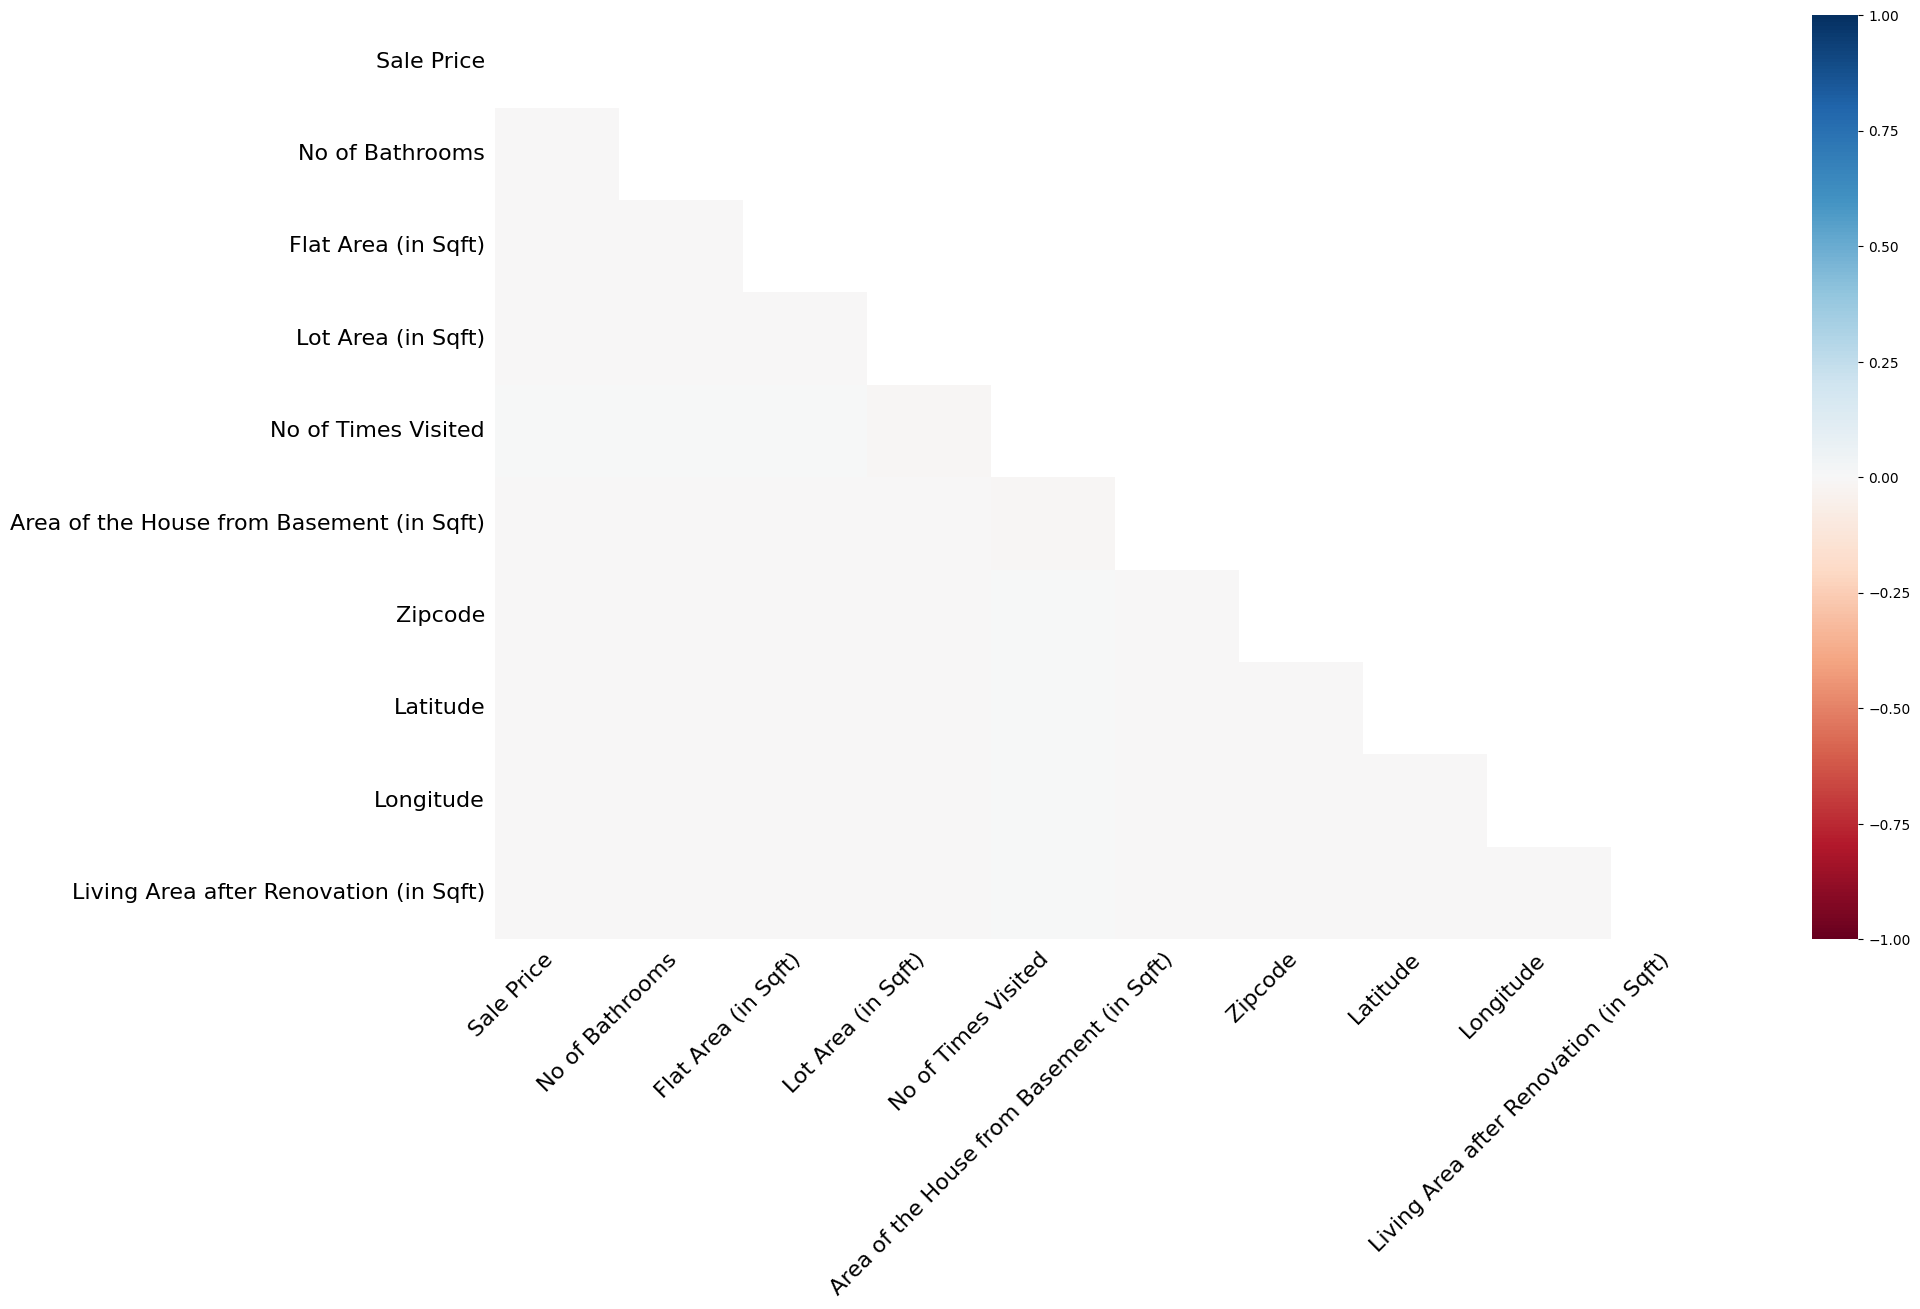

In [33]:
msno.heatmap(data,labels=True)

In [35]:
def get_numerical_summary(data):
  total=data.shape[0]
  missing_cols=[col for col in data.columns if data[col].isnull().sum()>0]
  missing_percentage={}

  for col in missing_cols:
   null_count=data[col].isnull().sum()
   per=(null_count/total)*100
   missing_percentage[col]=per
   print(f'{col}:{null_count},({round(per,3)})')
  return missing_percentage


In [37]:
missing_percentage=get_numerical_summary(data)

Sale Price:4,(0.019)
No of Bathrooms:4,(0.019)
Flat Area (in Sqft):9,(0.042)
Lot Area (in Sqft):9,(0.042)
No of Times Visited:19489,(90.173)
Area of the House from Basement (in Sqft):3,(0.014)
Zipcode:1,(0.005)
Latitude:1,(0.005)
Longitude:1,(0.005)
Living Area after Renovation (in Sqft):1,(0.005)


In [39]:
data.drop('No of Times Visited', axis=1, inplace=True)

In [40]:
data.shape

(21613, 20)

In [41]:
data.isna().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   4
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

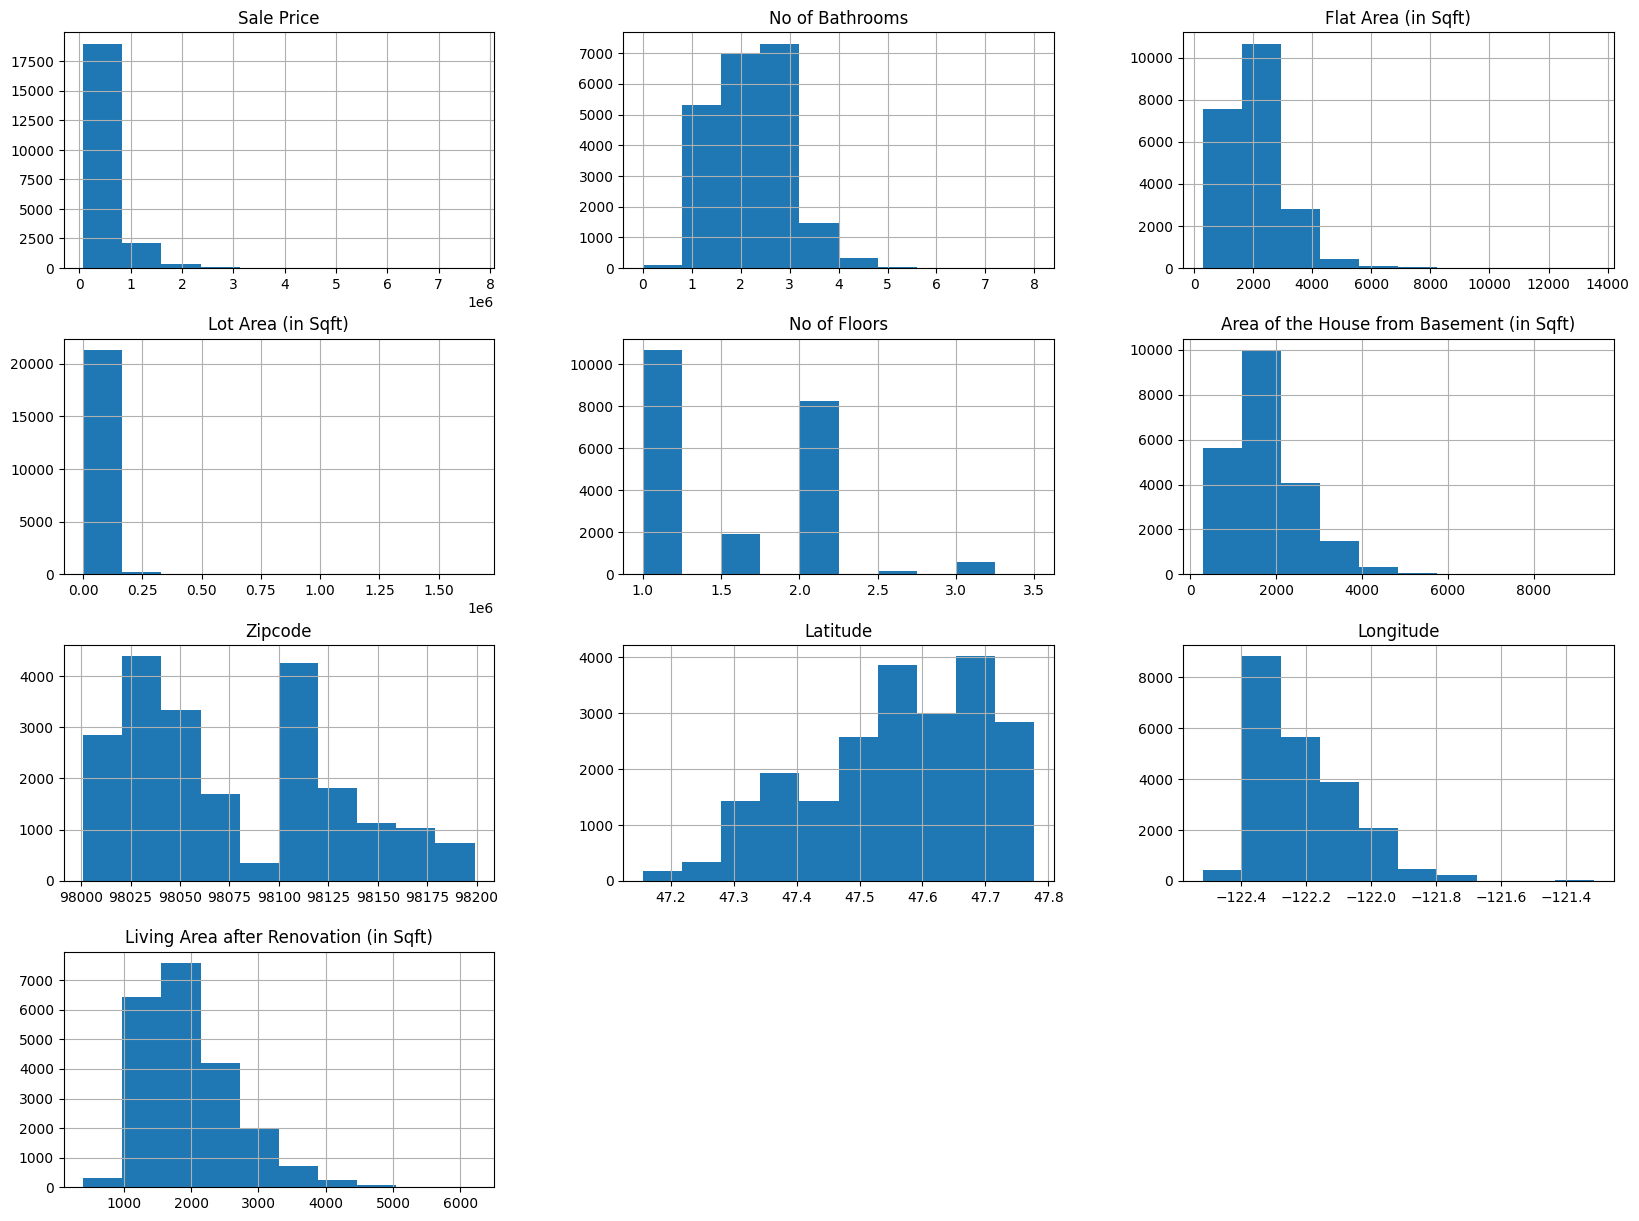

In [43]:
freqgraph =data.select_dtypes(include =['float'])
freqgraph.hist(figsize=(20,15))
plt.show()

In [44]:
data.columns

Index(['ID', 'Date House was Sold', 'Sale Price', 'No of Bedrooms',
       'No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)',
       'No of Floors', 'Waterfront View', 'Condition of the House',
       'Overall Grade', 'Area of the House from Basement (in Sqft)',
       'Basement Area (in Sqft)', 'Age of House (in Years)', 'Renovated Year',
       'Zipcode', 'Latitude', 'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)'],
      dtype='object')

In [ ]:
# print the columns that having missing values

In [45]:
missing_columns =[]
for col in data.columns:
    if data[col].isnull().sum() > 0:
        missing_columns.append(col)

In [46]:
missing_columns

['Sale Price',
 'No of Bathrooms',
 'Flat Area (in Sqft)',
 'Lot Area (in Sqft)',
 'Area of the House from Basement (in Sqft)',
 'Zipcode',
 'Latitude',
 'Longitude',
 'Living Area after Renovation (in Sqft)']

In [49]:
missing_columns = pd.DataFrame(['Sale Price','No of Bathrooms','Flat Area (in Sqft)',
 'Lot Area (in Sqft)','Area of the House from Basement (in Sqft)','Zipcode','Latitude',
 'Longitude','Living Area after Renovation (in Sqft)'])

In [50]:
for col in ['Sale Price','No of Bathrooms','Flat Area (in Sqft)',
 'Lot Area (in Sqft)','Area of the House from Basement (in Sqft)','Zipcode','Latitude',
 'Longitude', 'Living Area after Renovation (in Sqft)']:
         data[col] = data[col].fillna(data[col].median())

In [51]:
data.isna().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [52]:
#Convert 'Date House was Sold' to datetime objects

In [53]:
data['Date House was Sold'] = pd.to_datetime(data['Date House was Sold'])


In [54]:
data['Year Sold'] = data['Date House was Sold'].dt.year
data['Month Sold'] = data['Date House was Sold'].dt.month
data['Day Sold'] = data['Date House was Sold'].dt.day

In [ ]:
#calculate the correlation that include only numeric columns for correlation calculation

In [55]:
numeric_data = data.select_dtypes(include=['number'])
numeric_data.corr()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Year Sold,Month Sold,Day Sold
ID,1.000000,-0.016800,0.001286,0.005149,-0.012388,-0.132112,0.018525,0.013799,-0.010753,-0.005151,-0.021380,-0.016907,-0.008282,-0.001945,0.020804,-0.002881,-0.138798,-0.010128,-0.011708,0.010128
Sale Price,-0.016800,1.000000,0.308366,0.525041,0.702024,0.089568,0.256836,0.580644,0.605344,0.323781,-0.053988,0.126444,-0.053190,0.306850,0.021538,0.585377,0.082456,-0.003551,-0.010060,0.003551
No of Bedrooms,0.001286,0.308366,1.000000,0.515866,0.576566,0.031668,0.175429,0.349008,0.477583,0.303093,-0.154178,0.018841,-0.152651,-0.008885,0.129494,0.391651,0.029244,0.009838,-0.001533,-0.009838
No of Bathrooms,0.005149,0.525041,0.515866,1.000000,0.754565,0.087717,0.500575,0.635541,0.685099,0.283767,-0.505928,0.050745,-0.203965,0.024495,0.223125,0.568542,0.087213,0.026439,0.007176,-0.026439
Flat Area (in Sqft),-0.012388,0.702024,0.576566,0.754565,1.000000,0.172723,0.353875,0.705666,0.876211,0.435160,-0.318063,0.055380,-0.199397,0.052518,0.240111,0.756188,0.183228,0.029132,0.011917,-0.029132
Lot Area (in Sqft),-0.132112,0.089568,0.031668,0.087717,0.172723,1.000000,-0.005218,0.102316,0.183489,0.015264,-0.053069,0.007643,-0.129537,-0.085707,0.229466,0.144516,0.718531,-0.005516,-0.002370,0.005516
No of Floors,0.018525,0.256836,0.175429,0.500575,0.353875,-0.005218,1.000000,0.461228,0.523818,-0.245705,-0.489319,0.006338,-0.059122,0.049644,0.125394,0.279858,-0.011269,0.022315,0.014005,-0.022315
Overall Grade,0.013799,0.580644,0.349008,0.635541,0.705666,0.102316,0.461228,1.000000,0.705072,0.145266,-0.456629,0.010440,-0.185839,0.111298,0.201746,0.681332,0.107581,0.030953,0.007640,-0.030953
Area of the House from Basement (in Sqft),-0.010753,0.605344,0.477583,0.685099,0.876211,0.183489,0.523818,0.705072,1.000000,-0.051836,-0.423792,0.023309,-0.261105,-0.000898,0.343775,0.731962,0.194106,0.023762,0.009950,-0.023762
Basement Area (in Sqft),-0.005151,0.323781,0.303093,0.283767,0.435160,0.015264,-0.245705,0.145266,-0.051836,1.000000,0.133124,0.071323,0.074856,0.110552,-0.144730,0.200375,0.017276,0.015687,0.006035,-0.015687


In [ ]:
#plot the correlation matrix like heatmap


In [56]:
import matplotlib.pyplot as plt

In [58]:
correlation_matrix = numeric_data.corr()


#plot the heat map

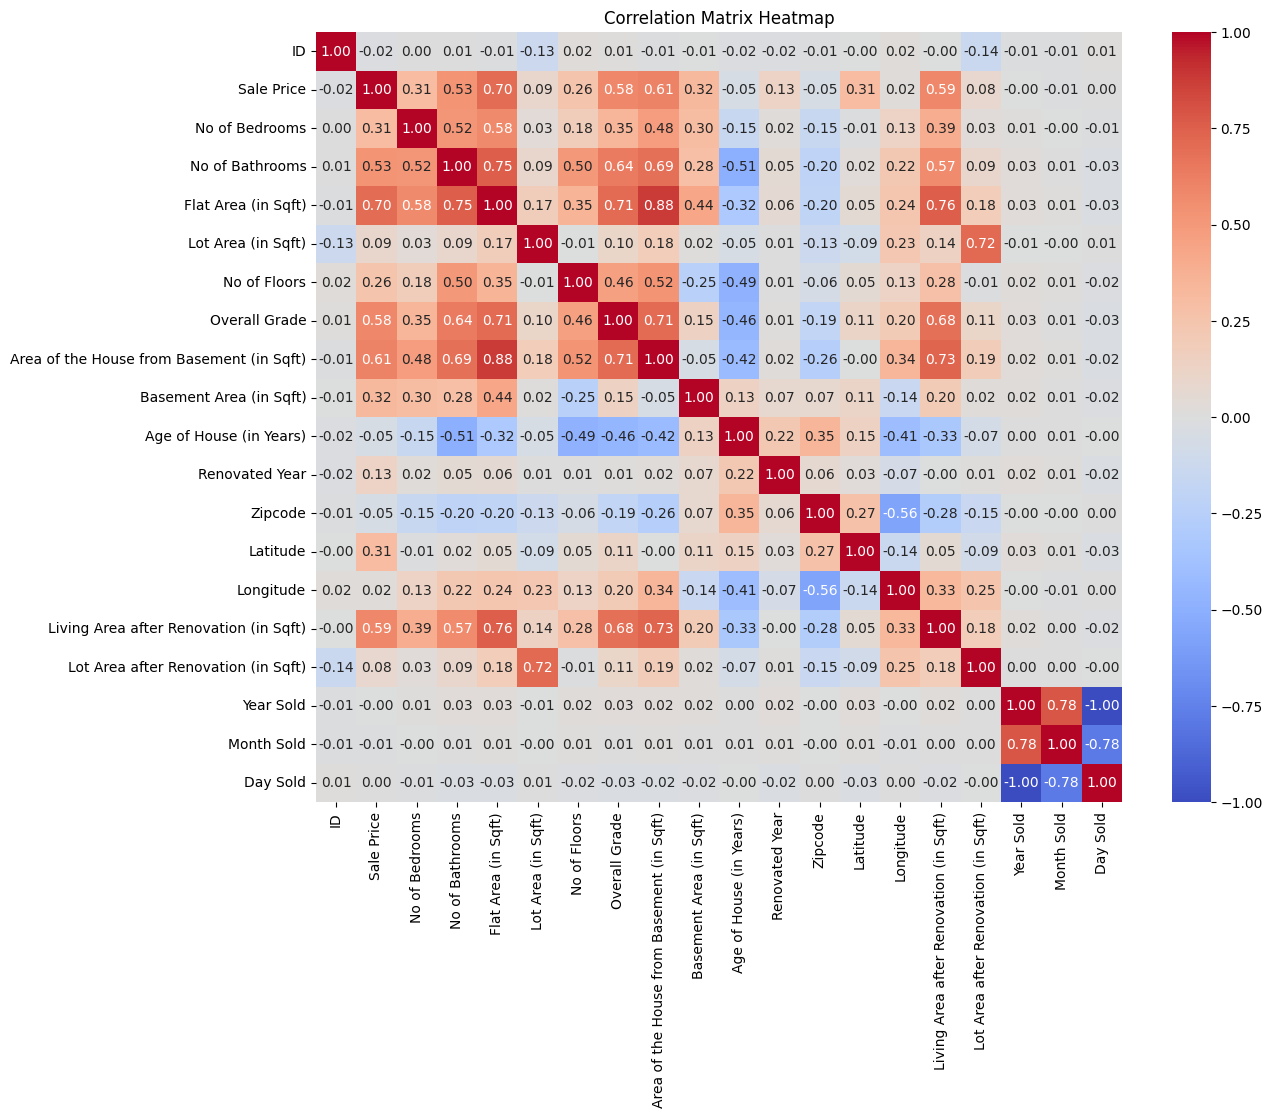

In [59]:
plt.figure(figsize=(13, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

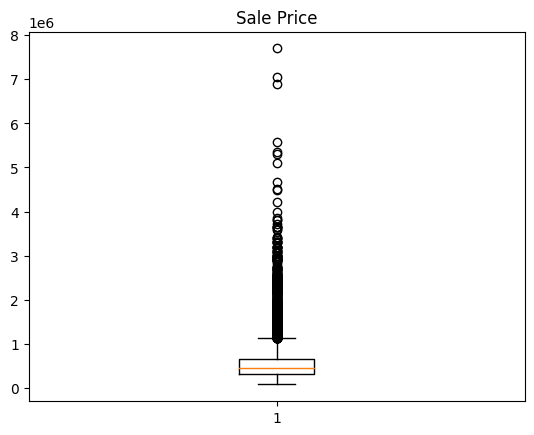

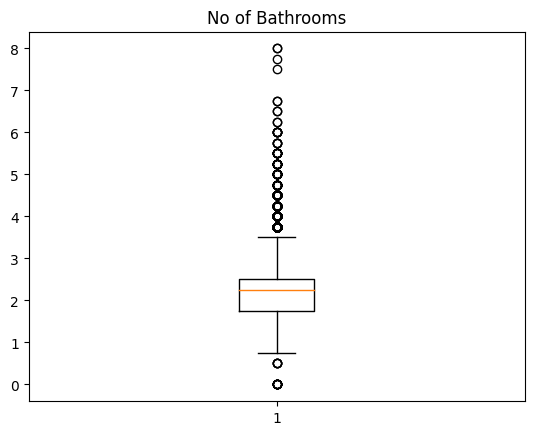

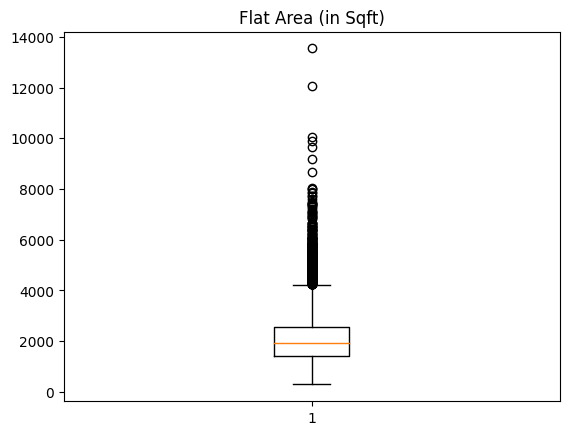

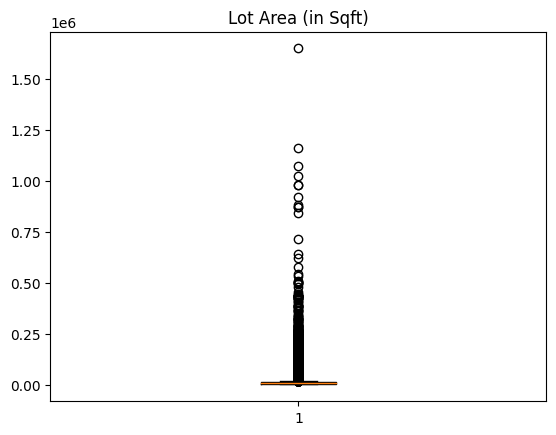

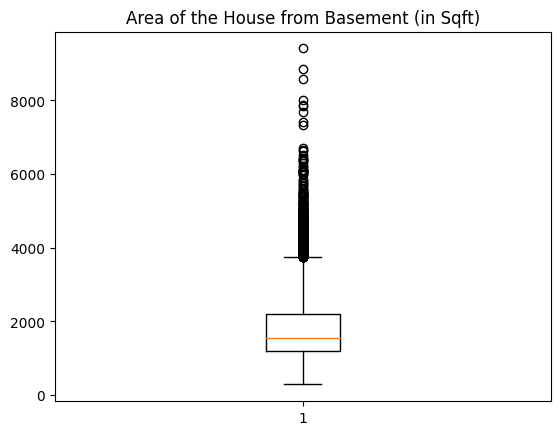

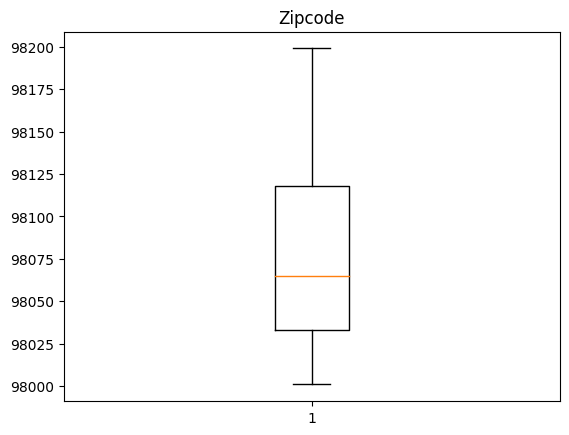

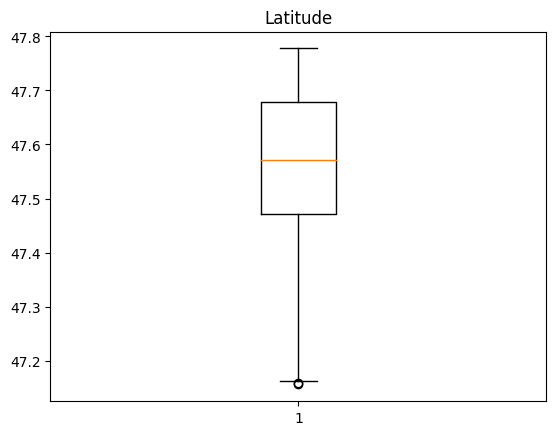

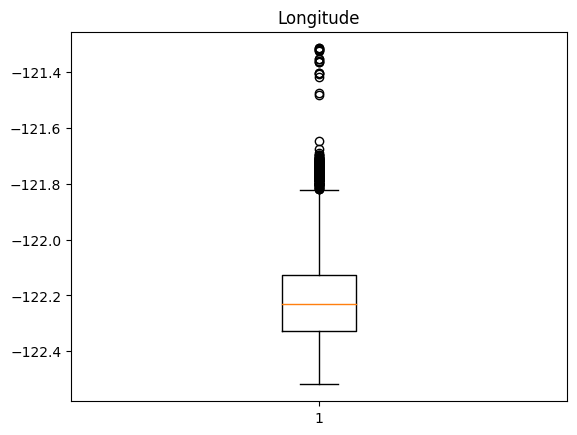

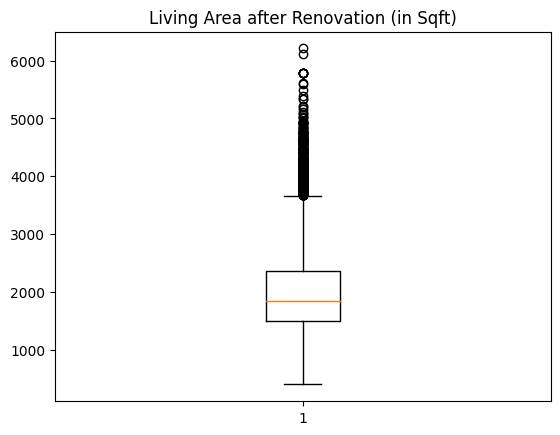

In [60]:
for i in ['Sale Price',
 'No of Bathrooms',
 'Flat Area (in Sqft)',
 'Lot Area (in Sqft)',
 'Area of the House from Basement (in Sqft)',
 'Zipcode',
 'Latitude',
 'Longitude',
 'Living Area after Renovation (in Sqft)']:
         plt.figure()
         plt.boxplot(data[i])
         plt.title(i)

In [ ]:
# show the columns having the outliers

In [61]:
outlier_columns = []
for i in ['Sale Price',
 'No of Bathrooms',
 'Flat Area (in Sqft)',
 'Lot Area (in Sqft)',
 'Area of the House from Basement (in Sqft)',
 'Zipcode',
 'Latitude',
 'Longitude',
 'Living Area after Renovation (in Sqft)']:
  # Calculate quartiles
  Q1 =data[i].quantile(0.25)
  Q3 =data[i].quantile(0.75)
  IQR = Q3 - Q1

  # Define outlier boundaries
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Count outliers
  outliers = data[(data[i] < lower_bound) | (data[i] > upper_bound)]
  if outliers.shape[0] > 0:
    outlier_columns.append(i)
    print(f"Column '{i}' has {outliers.shape[0]} outliers.")

print("\nColumns with outliers:")
for col in outlier_columns:
    print(col)


Column 'Sale Price' has 1159 outliers.
Column 'No of Bathrooms' has 571 outliers.
Column 'Flat Area (in Sqft)' has 572 outliers.
Column 'Lot Area (in Sqft)' has 2423 outliers.
Column 'Area of the House from Basement (in Sqft)' has 610 outliers.
Column 'Latitude' has 2 outliers.
Column 'Longitude' has 256 outliers.
Column 'Living Area after Renovation (in Sqft)' has 544 outliers.

Columns with outliers:
Sale Price
No of Bathrooms
Flat Area (in Sqft)
Lot Area (in Sqft)
Area of the House from Basement (in Sqft)
Latitude
Longitude
Living Area after Renovation (in Sqft)


In [62]:
q1 = data['Lot Area (in Sqft)'].quantile(0.25)
q2 = data['Lot Area (in Sqft)'].quantile(0.50)
q3 = data['Lot Area (in Sqft)'].quantile(0.75)


In [63]:
print(q1,q2,q3)

5040.0 7617.5 10685.0


In [64]:
iqr = q3 - q1
lc = q1 - (1.5*iqr)
uc = q3 + (1.5*iqr)

In [65]:
print (iqr,lc,uc)

5645.0 -3427.5 19152.5


In [66]:
outlier = data[(data['Lot Area (in Sqft)']<lc) | (data['Lot Area (in Sqft)']>uc)].index

In [67]:
outlier

Index([    5,    12,    21,    36,    41,    49,    60,    69,    70,    74,
       ...
       21431, 21470, 21484, 21485, 21486, 21494, 21506, 21520, 21525, 21548],
      dtype='int64', length=2423)

In [68]:
data.drop(outlier, inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7b0882617760>,
 'caps': [<matplotlib.lines.Line2D at 0x7b0882814b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7b088248f190>],
 'medians': [<matplotlib.lines.Line2D at 0x7b088264de70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7b088264c400>],
 'means': []}

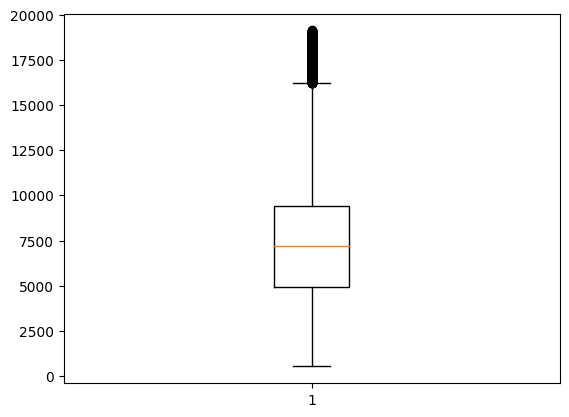

In [69]:
plt.boxplot(data['Lot Area (in Sqft)'])

In [71]:
data.shape

(19190, 23)

In [72]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,...,Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Year Sold,Month Sold,Day Sold
0,7129300520,2017-10-14,221900.0,3,1.00,1180.0,5650.0,1.0,No,Fair,...,63,0,98178.0,47.5112,-122.257,1340.0,5650,2017,10,14
1,6414100192,2017-12-14,538000.0,3,2.25,2570.0,7242.0,2.0,No,Fair,...,67,1991,98125.0,47.7210,-122.319,1690.0,7639,2017,12,14
2,5631500400,2016-02-15,180000.0,2,1.00,770.0,10000.0,1.0,No,Fair,...,85,0,98028.0,47.7379,-122.233,2720.0,8062,2016,2,15
3,2487200875,2017-12-14,604000.0,4,3.00,1960.0,5000.0,1.0,No,Excellent,...,53,0,98136.0,47.5208,-122.393,1360.0,5000,2017,12,14
4,1954400510,2016-02-15,510000.0,3,2.00,1680.0,8080.0,1.0,No,Fair,...,31,0,98074.0,47.6168,-122.045,1800.0,7503,2016,2,15


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19190 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   ID                                         19190 non-null  int64         
 1   Date House was Sold                        19190 non-null  datetime64[ns]
 2   Sale Price                                 19190 non-null  float64       
 3   No of Bedrooms                             19190 non-null  int64         
 4   No of Bathrooms                            19190 non-null  float64       
 5   Flat Area (in Sqft)                        19190 non-null  float64       
 6   Lot Area (in Sqft)                         19190 non-null  float64       
 7   No of Floors                               19190 non-null  float64       
 8   Waterfront View                            19190 non-null  object        
 9   Condition of the House

In [74]:
data['Waterfront View'].nunique()

2

In [75]:
data['Condition of the House'].nunique()

5

In [76]:
data['Waterfront View'].unique()

array(['No', 'Yes'], dtype=object)

In [77]:
data['Condition of the House'].unique()

array(['Fair', 'Excellent', 'Good', 'Okay', 'Bad'], dtype=object)

In [78]:
from sklearn.preprocessing import OrdinalEncoder
ordinal = OrdinalEncoder(categories=[['Bad', 'Okay', 'Fair', 'Good', 'Excellent']])
data['Condition of the House'] = ordinal.fit_transform(data[['Condition of the House']])


In [79]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,...,Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Year Sold,Month Sold,Day Sold
0,7129300520,2017-10-14,221900.0,3,1.00,1180.0,5650.0,1.0,No,2.0,...,63,0,98178.0,47.5112,-122.257,1340.0,5650,2017,10,14
1,6414100192,2017-12-14,538000.0,3,2.25,2570.0,7242.0,2.0,No,2.0,...,67,1991,98125.0,47.7210,-122.319,1690.0,7639,2017,12,14
2,5631500400,2016-02-15,180000.0,2,1.00,770.0,10000.0,1.0,No,2.0,...,85,0,98028.0,47.7379,-122.233,2720.0,8062,2016,2,15
3,2487200875,2017-12-14,604000.0,4,3.00,1960.0,5000.0,1.0,No,4.0,...,53,0,98136.0,47.5208,-122.393,1360.0,5000,2017,12,14
4,1954400510,2016-02-15,510000.0,3,2.00,1680.0,8080.0,1.0,No,2.0,...,31,0,98074.0,47.6168,-122.045,1800.0,7503,2016,2,15


In [80]:
ordinal = OrdinalEncoder(categories=[['No','Yes']])
data['Waterfront View'] = ordinal.fit_transform(data[['Waterfront View']])


In [81]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,...,Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Year Sold,Month Sold,Day Sold
0,7129300520,2017-10-14,221900.0,3,1.00,1180.0,5650.0,1.0,0.0,2.0,...,63,0,98178.0,47.5112,-122.257,1340.0,5650,2017,10,14
1,6414100192,2017-12-14,538000.0,3,2.25,2570.0,7242.0,2.0,0.0,2.0,...,67,1991,98125.0,47.7210,-122.319,1690.0,7639,2017,12,14
2,5631500400,2016-02-15,180000.0,2,1.00,770.0,10000.0,1.0,0.0,2.0,...,85,0,98028.0,47.7379,-122.233,2720.0,8062,2016,2,15
3,2487200875,2017-12-14,604000.0,4,3.00,1960.0,5000.0,1.0,0.0,4.0,...,53,0,98136.0,47.5208,-122.393,1360.0,5000,2017,12,14
4,1954400510,2016-02-15,510000.0,3,2.00,1680.0,8080.0,1.0,0.0,2.0,...,31,0,98074.0,47.6168,-122.045,1800.0,7503,2016,2,15
